In [1]:
!pip install missingno
!pip install prettytable
!pip install yellowbrick
!pip install gap-stat
!pip install optuna
!pip install catboost category-encoders imbalanced-learn lightgbm xgboost
!pip install category_encoders
!pip install -U imbalanced-learn

In [2]:
!pip install --progress-bar off --upgrade --quiet autogluon

In [3]:
import sklearn
import numpy as np
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from prettytable import PrettyTable
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook
tqdm_notebook.get_lock().locks = []
# !pip install sweetviz
# import sweetviz as sv
import concurrent.futures
import copy
from copy import deepcopy       
from functools import partial
from itertools import combinations
import random
from random import randint, uniform
import gc
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler,PowerTransformer, FunctionTransformer
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from itertools import combinations
from sklearn.impute import SimpleImputer
import xgboost as xg
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,mean_squared_log_error, roc_auc_score, accuracy_score, f1_score, precision_recall_curve, log_loss
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from gap_statistic.optimalK import OptimalK
from scipy import stats
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import boxcox
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
import optuna
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder, CatBoostEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier,ExtraTreesClassifier, AdaBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from catboost import Pool
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from autogluon.tabular import TabularPredictor


import joblib 

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns',None)

/opt/conda/lib/python3.8/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [4]:
sub1 = pd.read_csv("2023_09_30.csv")
sub2 = pd.read_csv("gang2.csv")
sub3 = pd.read_csv("isitright.csv")

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
origin = pd.read_csv('horse.csv')
sample_submission = pd.read_csv('sample_submission.csv')

train = train.replace('None', np.NaN)
test = test.replace('None', np.NaN)
origin = origin.replace('None', np.NaN)

In [6]:
concatenated_df = pd.concat([ sub1["outcome"], sub2["outcome"],sub3['outcome']], axis=1)
same_categories = concatenated_df.apply(lambda row: row.nunique() == 1, axis=1)
df_same_categories = concatenated_df[same_categories]
df_same_categories

,outcome,outcome,outcome
0,lived,lived,lived
1,died,died,died
2,lived,lived,lived
3,euthanized,euthanized,euthanized
4,lived,lived,lived
...,...,...,...
818,died,died,died
819,died,died,died
820,euthanized,euthanized,euthanized
822,lived,lived,lived


In [7]:
different_categories=concatenated_df.apply(lambda row: row.nunique()> 1, axis=1)
df_different_categories = concatenated_df[different_categories]
df_different_categories

,outcome,outcome,outcome
12,euthanized,lived,euthanized
36,died,lived,died
39,euthanized,lived,euthanized
43,euthanized,lived,euthanized
48,died,lived,lived
...,...,...,...
792,died,lived,euthanized
809,euthanized,lived,euthanized
815,euthanized,lived,euthanized
817,lived,died,lived


In [8]:
print(df_different_categories.index.tolist())

[12, 36, 39, 43, 48, 54, 61, 76, 87, 88, 96, 97, 99, 103, 110, 111, 124, 128, 130, 132, 133, 138, 145, 146, 149, 152, 170, 177, 185, 187, 195, 212, 218, 234, 236, 242, 253, 278, 288, 291, 293, 295, 307, 317, 322, 324, 329, 336, 345, 366, 370, 373, 379, 387, 389, 394, 397, 403, 406, 410, 416, 431, 446, 452, 456, 463, 464, 487, 489, 493, 502, 512, 515, 517, 529, 530, 534, 539, 543, 544, 545, 547, 549, 551, 552, 561, 563, 570, 585, 591, 592, 597, 598, 601, 604, 606, 623, 628, 630, 656, 657, 662, 673, 692, 693, 695, 696, 704, 707, 711, 713, 717, 729, 739, 747, 754, 771, 778, 789, 792, 809, 815, 817, 821]


In [9]:
all_different_categories=concatenated_df.apply(lambda row: row.nunique()> 2, axis=1)
df_all_different_categories= concatenated_df[all_different_categories]
df_all_different_categories

,outcome,outcome,outcome
152,euthanized,lived,died
464,died,lived,euthanized
597,lived,died,euthanized
792,died,lived,euthanized


In [10]:
print(df_all_different_categories.index.tolist())

[152, 464, 597, 792]


In [11]:
sub=sub1.copy()

concatenated_df = pd.concat([sub1["outcome"], sub2["outcome"],sub3['outcome']], axis=1)
has_euthanized = (concatenated_df == "euthanized").any(axis=1) # & (concatenated_df != "lived").any(axis=1)

concatenated_df['euthanized'] = has_euthanized

concatenated_df['vote']=concatenated_df.drop(columns=['euthanized']).mode(axis=1).iloc[:, 0]
concatenated_df['vote']=np.where((concatenated_df['euthanized']==True) & (concatenated_df['vote']!="lived"), "euthanized", concatenated_df['vote'])
# concatenated_df.loc[df_all_different_categories.index.tolist(),'vote']="euthanized"
sub["outcome"]=concatenated_df['vote']

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


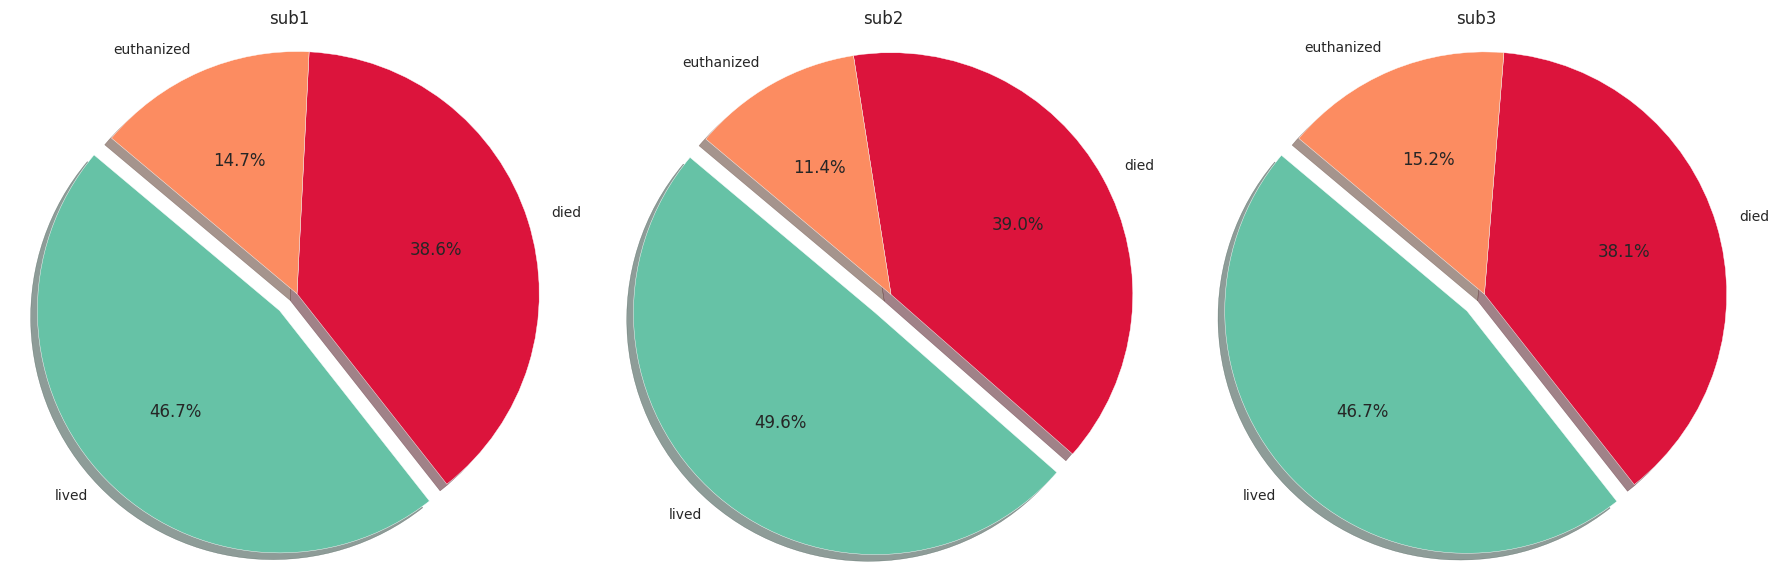

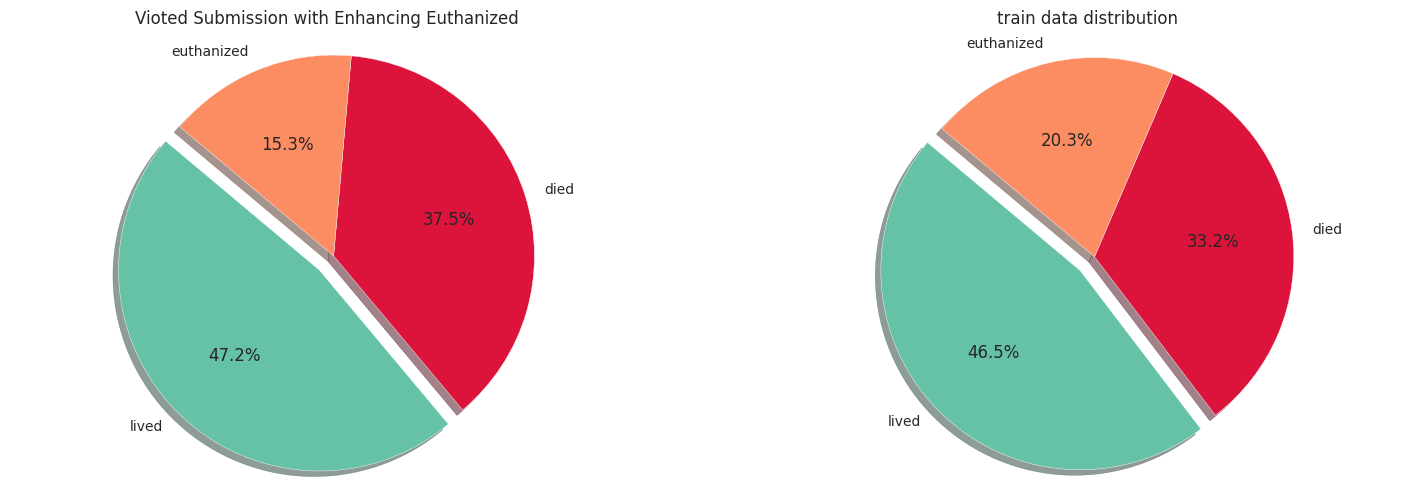

In [12]:
def plot_pie_chart(data, title, ax):
    data_counts = data['outcome'].value_counts()
    labels = data_counts.index
    sizes = data_counts.values
    colors = [ (0.4, 0.76, 0.65), 'crimson',  (0.99, 0.55, 0.38)]  
    explode = (0.1, 0, 0)  

    ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    ax.axis('equal') 
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Create three subplots in a row

plot_pie_chart(sub1, "sub1", axes[0])
plot_pie_chart(sub2, "sub2", axes[1])
plot_pie_chart(sub3, "sub3", axes[2])
# plot_pie_chart(sub4, "sub4", axes[3])
# plot_pie_chart(sub5, "sub5", axes[4])
# plot_pie_chart(sub6, "sub6", axes[5])


plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Create three subplots in a row

plot_pie_chart(sub, "Vioted Submission with Enhancing Euthanized", axes[0])
plot_pie_chart(train, "train data distribution", axes[1])

In [13]:
#sub.to_csv('voted_hoxi_mola4.csv',index=False)
#sub.head()

In [14]:
train = pd.read_csv("train_cleaned.csv")
test = pd.read_csv("test_cleaned.csv")

In [15]:
final_features=[f for f in train.columns if f not in ['outcome']]
final_features=[*set(final_features)]
sc=StandardScaler()

train_scaled=train.copy()
test_scaled=test.copy() #.drop(columns=['id'])
train_scaled[final_features]=sc.fit_transform(train[final_features])
test_scaled[final_features]=sc.transform(test[final_features])

def post_processor(train, test):
    cols=train.drop(columns=['outcome']).columns
    train_cop=train.copy()
    test_cop=test.copy()
    drop_cols=[]
    for i, feature in enumerate(cols):
        for j in range(i+1, len(cols)):
            if sum(abs(train_cop[feature]-train_cop[cols[j]]))==0:
                if cols[j] not in drop_cols:
                    drop_cols.append(cols[j])
    print(drop_cols)
    train_cop.drop(columns=drop_cols,inplace=True)
    test_cop.drop(columns=drop_cols,inplace=True)
    
    return train_cop, test_cop

                    
train_cop, test_cop=   post_processor(train_scaled, test_scaled)            

X_train = train_cop.drop(columns=['outcome'])
y_train = train['outcome']

X_test = test_cop.copy()

print(X_train.shape, X_test.shape)

"""
X_train = train[final_features]
y_train = train['outcome']
X_test = test[final_features]
"""

['yes_surgerysurgery', 'yes_surgical_lesionsurgical_lesion', 'lesion_2_1_count', 'lesion_2_1_count_label', 'NA_1_lesion_2_1lesion_2_1', 'Gastric_lesion_2_1lesion_2_1', 'Large_Colon_lesion_2_1lesion_2_1', 'Transverse_Colon_lesion_2_1lesion_2_1', 'yes_cp_datacp_data', '0original', 'Other_2_lesion_2_2lesion_2_2', 'lesion_2_3_target', 'NA3_lesion_2_3lesion_2_3', 'NA4_lesion_2_4lesion_2_4']
(1503, 211) (824, 211)


"\nX_train = train[final_features]\ny_train = train['outcome']\nX_test = test[final_features]\n"

In [16]:
for i in list(X_test.columns):
    if i not in list(X_train.columns):
        print(i)

In [17]:
target_map={
    "lived":0,
    "died": 1,
    "euthanized":2
}     

def encode(y,target_map):
    '''
    To convert the outputs to numbers
    '''
    y=np.array(y)
    encoded_y=[target_map[f] for f in y]
    return encoded_y
def decode(y,target_map):
    '''To convert the predictions back to classes
    '''
    y=np.array(y)
    reverse_dict={v: k for k, v in target_map.items()}
    decoded_y=[reverse_dict[f] for f in y]
    return decoded_y

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

X_train_cop = X_train.copy()
X_test_cop = X_test.copy()

def closest_index(X_test_cop, X_train_cop, index_test, num_closest=500):
    res = [] 
    for i in index_test:
        test_point = np.array(X_test_cop.loc[i]).reshape(1, -1)  
        similarities = cosine_similarity(X_train_cop, test_point)  
        closest_indices = np.argsort(similarities[:, 0])[-num_closest:][::-1] 
        res.append(closest_indices)  
    return np.array(res)

res = closest_index(X_test_cop, X_train_cop, df_all_different_categories.index.tolist())
res=res.reshape(1,-1)[0]
print("Closest indexes in X_train:", res)

Closest indexes in X_train: [1347  373 1375 ... 1199  857  995]


In [19]:
res=[*set(res)]
print(f"Among {X_train.shape[0]} data points in the train, we have identified {len(res)} , it also means some of them got eliminated")

Among 1503 data points in the train, we have identified 1159 , it also means some of them got eliminated


In [20]:
X_train=X_train.loc[res]
y_train=y_train.loc[res]

X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True) #.map(({0: 'died', 1: 'lived', 2:'euthanized'}))


import re
X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [21]:
def get_most_important_features(X_train, y_train, n,model_input):
    xgb_params = {
            'n_estimators': 200,
            'learning_rate': 0.05,
            'max_depth': 4,
            'subsample': 0.8,
            'colsample_bytree': 0.1,
            'n_jobs': -1,
            'eval_metric': 'mlogloss',
            'objective': 'multi:softprob',
            'tree_method': 'hist',
            'verbosity': 0,
            'random_state': 42,
        }
    lgb_params = {
            'n_estimators': 200,
            'max_depth': 7,
            'learning_rate': 0.05,
            'subsample': 0.20,
            'colsample_bytree': 0.56,
            'reg_alpha': 0.25,
            'reg_lambda': 5e-08,
            'objective': 'multiclass',
            'metric': 'multi_logloss',
            'boosting_type': 'gbdt',
            'random_state': 42,
        }
    cb_params = {
            'iterations': 200,
            'depth': 7,
            'learning_rate': 0.1,
            'l2_leaf_reg': 0.7,
            'random_strength': 0.2,
            'max_bin': 200,
            'od_wait': 65,
            'one_hot_max_size': 70,
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'MultiClass',
            'loss_function': 'MultiClass',
            'random_state': 42,
        }
    if 'xgb' in model_input:
        model = xgb.XGBClassifier(**xgb_params)
    elif 'cat' in model_input:
        model=CatBoostClassifier(**cb_params)
    else:
        model=lgb.LGBMClassifier(**lgb_params)
        
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []
    feature_importances_list = []
    
    for train_idx, val_idx in kfold.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_train_fold, encode(y_train_fold,target_map), verbose=False)
        
        y_pred = model.predict(X_val_fold)
        f1_scores.append(f1_score(encode(y_val_fold,target_map), y_pred, average='micro'))
        feature_importances = model.feature_importances_
        feature_importances_list.append(feature_importances)

    avg_f1 = np.mean(f1_scores)
    avg_feature_importances = np.mean(feature_importances_list, axis=0)

    feature_importance_list = [(X_train.columns[i], importance) for i, importance in enumerate(avg_feature_importances)]
    sorted_features = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)
    top_n_features = [feature[0] for feature in sorted_features[:n]]

    display_features=top_n_features[:25]
    
    sns.set_palette("Set2")
    plt.figure(figsize=(8, 15))
    plt.barh(range(len(display_features)), [avg_feature_importances[X_train.columns.get_loc(feature)] for feature in display_features])
    plt.yticks(range(len(display_features)), display_features, fontsize=12)
    plt.xlabel('Average Feature Importance', fontsize=14)
    plt.ylabel('Features', fontsize=10)
    plt.title(f'Top {25} of {n} Feature Importances with best F1 score {avg_f1}', fontsize=16)
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Add data labels on the bars
    for index, value in enumerate([avg_feature_importances[X_train.columns.get_loc(feature)] for feature in display_features]):
        plt.text(value + 0.005, index, f'{value:.3f}', fontsize=12, va='center')

    plt.tight_layout()
    plt.show()

    return top_n_features

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


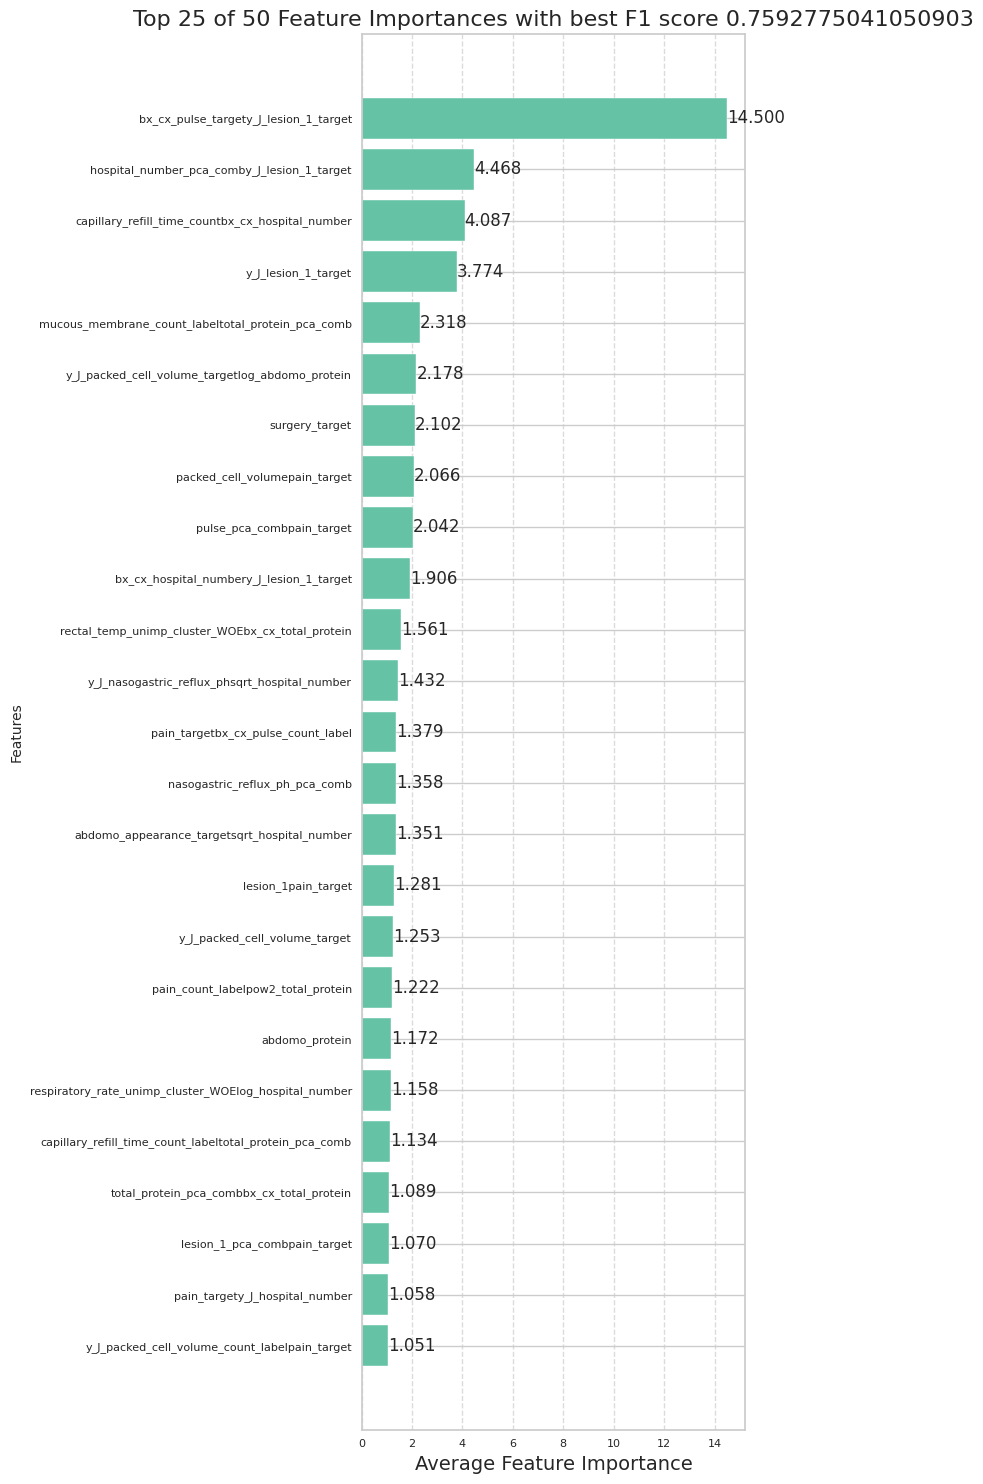

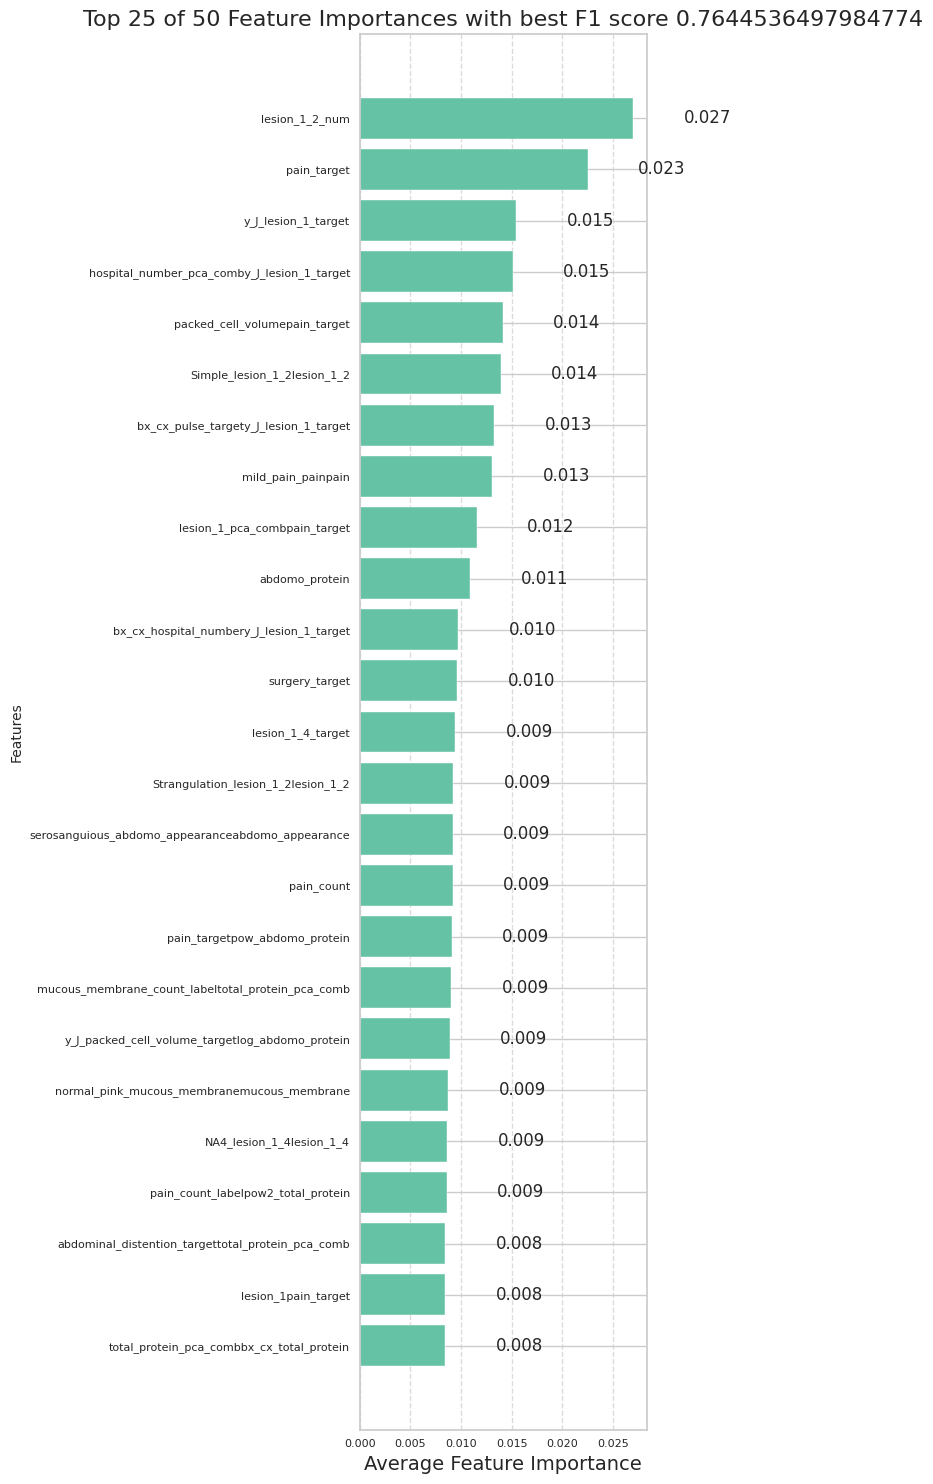

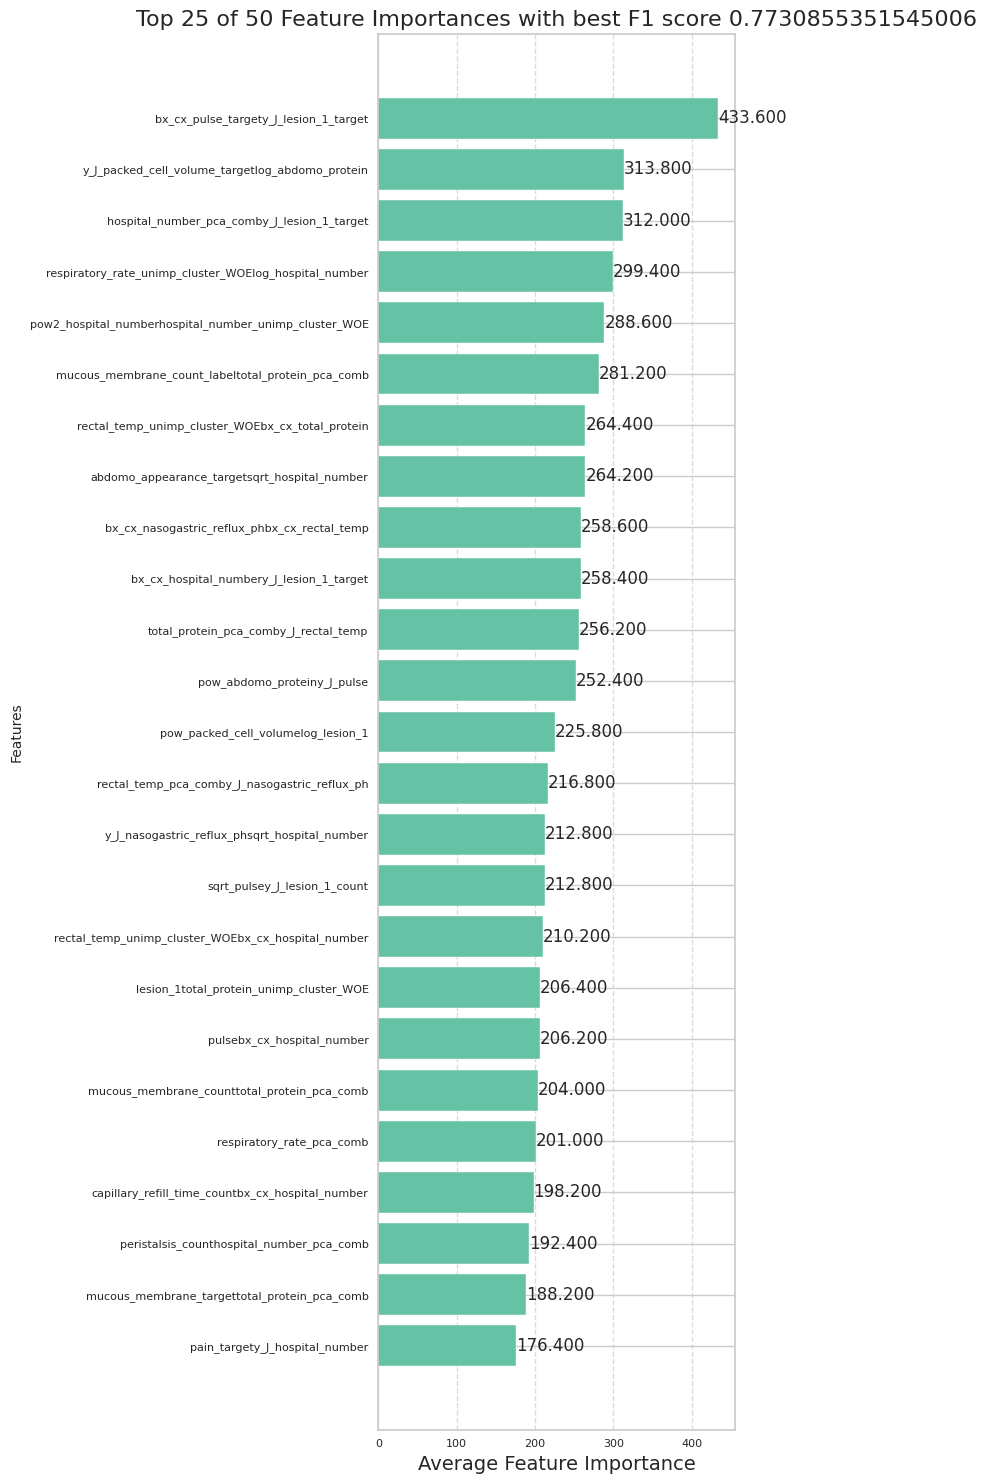

84 features have been selected from three algorithms for the final model


In [22]:
n_imp_features_cat=get_most_important_features(X_train.reset_index(drop=True), y_train,50, 'cat')
n_imp_features_xgb=get_most_important_features(X_train.reset_index(drop=True), y_train,50, 'xgb')
n_imp_features_lgbm=get_most_important_features(X_train.reset_index(drop=True), y_train,50, 'lgbm')

n_imp_features=[*set(n_imp_features_xgb+n_imp_features_lgbm+n_imp_features_cat)]
#n_imp_features=[*set(n_imp_features_xgb+n_imp_features_cat)]

print(f"{len(n_imp_features)} features have been selected from three algorithms for the final model")

X_train=X_train[n_imp_features]
X_test=X_test[n_imp_features]

In [23]:
X = pd.concat([X_train,y_train],axis=1)

In [24]:
automl = TabularPredictor(problem_type='multiclass', label='outcome', eval_metric='f1_micro')
automl.fit(X, presets='best_quality', num_stack_levels=3, num_bag_folds=10, num_bag_sets=5)

automl.leaderboard(silent=True)

No path specified. Models will be saved in: "AutogluonModels/ag-20231002_171550/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=3, num_bag_folds=10, num_bag_sets=5
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231002_171550/"
AutoGluon Version:  0.8.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #179-Ubuntu SMP Mon Aug 14 08:51:31 UTC 2023
Disk Space Avail:   36.57 GB / 199.67 GB (18.3%)
Train Data Rows:    1159
Train Data Columns: 84
Label Column: outcome
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    66710.04 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the featur

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.797239,5.012612,300.849476,0.000780,0.868557,2,True,14
1,WeightedEnsemble_L4,0.789474,56.226397,4510.166385,0.000838,0.753207,4,True,38
2,WeightedEnsemble_L3,0.788611,28.774619,1567.302355,0.000876,0.737878,3,True,26
3,LightGBM_BAG_L1,0.787748,1.185263,112.967643,1.185263,112.967643,1,True,5
4,NeuralNetFastAI_BAG_L2,0.786022,27.825590,1458.424334,5.162214,91.615796,2,True,15
5,NeuralNetFastAI_BAG_L3,0.785160,51.098423,3173.950992,3.517000,93.537776,3,True,27
6,LightGBMLarge_BAG_L1,0.783434,2.676170,315.421723,2.676170,315.421723,1,True,13
7,XGBoost_BAG_L1,0.782571,1.282665,101.794559,1.282665,101.794559,1,True,11
8,LightGBMXT_BAG_L3,0.780846,48.402348,3182.760438,0.820924,102.347222,3,True,28
9,NeuralNetFastAI_BAG_L1,0.779983,2.543905,85.218717,2.543905,85.218717,1,True,3


In [25]:
predictions = automl.predict(X_test)
predictions

0           lived
1            died
2           lived
3      euthanized
4           lived
          ...    
819          died
820    euthanized
821          died
822         lived
823         lived
Name: outcome, Length: 824, dtype: object

In [26]:
submission_df = pd.DataFrame({'id': sample_submission['id'], 'outcome': predictions.values})
#submission_df['outcome'] = submission_df['outcome'].map({0: 'died', 1: 'lived', 2: 'euthanized'})
submission_df.to_csv('thisismyfinal2.csv', index=False)

print(submission_df.shape)
submission_df.head(3)

(824, 2)


,id,outcome
0,1235,lived
1,1236,died
2,1237,lived
